# Advanced Topics: HW 8

## Max Hanrahan

## Problem 1. 

For TM polarization, the transfer matrix is given by 9.39:

$$
M_{12} = \left[\begin{matrix}0.5 + \frac{0.5 \epsilon_{2} k_{1z}}{\epsilon_{1} k_{2z}} & 0.5 - \frac{0.5 \epsilon_{2} k_{1z}}{\epsilon_{1} k_{2z}}\\0.5 - \frac{0.5 \epsilon_{2} k_{1z}}{\epsilon_{1} k_{2z}} & 0.5 + \frac{0.5 \epsilon_{2} k_{1z}}{\epsilon_{1} k_{2z}}\end{matrix}\right]
$$
and similary, for the other medium:
$$
M_{23} = \left[\begin{matrix}0.5 + \frac{0.5 \epsilon_{3} k_{2z}}{\epsilon_{2} k_{3z}} & 0.5 - \frac{0.5 \epsilon_{3} k_{2z}}{\epsilon_{2} k_{3z}}\\0.5 - \frac{0.5 \epsilon_{3} k_{2z}}{\epsilon_{2} k_{3z}} & 0.5 + \frac{0.5 \epsilon_{3} k_{2z}}{\epsilon_{2} k_{3z}}\end{matrix}\right]
$$

and our TM waves obey the following:

$$
\left(\begin{matrix} H_3^+ \\ H_3^-
\end{matrix}\right)= \underbrace{M_{12} \left[\begin{matrix}e^{i k_{2z} l} & 0\\0 & e^{- i k_{2z} l}\end{matrix}\right] M_{23}}_{M_P}\left(\begin{matrix} H_1^+ \\ H_1^-
\end{matrix}\right)
$$

In [1]:
from sympy import symbols, Matrix, exp, I, simplify, det, latex, pprint

# Define symbols
eps_1, eps_2, eps_3 = symbols('epsilon_1 epsilon_2 epsilon_3')
k_1z, k_2z, k_3z, l = symbols('k_{1z} k_{2z} k_{3z} l')

ratio = (eps_2 / eps_1 ) * (k_1z / k_2z)
M_12 = (1/2) * Matrix([[1+ ratio, 1-ratio], [1-ratio, 1+ratio]])


In [2]:
M_23 = M_12.subs({eps_2: eps_3, k_2z: k_3z})
M_23 = M_23.subs({eps_1: eps_2, k_1z: k_2z})

In [3]:
e_matrix = Matrix([[exp(I*k_2z* l), 0], [0, exp(-I*k_2z* l)]])

 ### Now we have three matrices, and they look like this:

In [4]:
M_12

Matrix([
[0.5 + 0.5*epsilon_2*k_{1z}/(epsilon_1*k_{2z}), 0.5 - 0.5*epsilon_2*k_{1z}/(epsilon_1*k_{2z})],
[0.5 - 0.5*epsilon_2*k_{1z}/(epsilon_1*k_{2z}), 0.5 + 0.5*epsilon_2*k_{1z}/(epsilon_1*k_{2z})]])

In [5]:
e_matrix

Matrix([
[exp(I*k_{2z}*l),                0],
[              0, exp(-I*k_{2z}*l)]])

In [6]:
M_23

Matrix([
[0.5 + 0.5*epsilon_3*k_{2z}/(epsilon_2*k_{3z}), 0.5 - 0.5*epsilon_3*k_{2z}/(epsilon_2*k_{3z})],
[0.5 - 0.5*epsilon_3*k_{2z}/(epsilon_2*k_{3z}), 0.5 + 0.5*epsilon_3*k_{2z}/(epsilon_2*k_{3z})]])

### So the next thing we need to calculate is:
$$
\underbrace{M_{12} \left[\begin{matrix}e^{i k_{2z} l} & 0\\0 & e^{- i k_{2z} l}\end{matrix}\right] M_{23}}_{M_P}
$$

because its elements can give us the reflectance and transmission amplitudes, and therefore reflectance and transmissions. 

In [7]:
M_P = (M_12 * e_matrix * M_23)

transmission amplitude:

In [8]:
trans = det(M_P)/M_P[1,1]

In [9]:
simplify(trans)

4.0*epsilon_2*epsilon_3*k_{1z}*k_{2z}*exp(I*k_{2z}*l)/((epsilon_1*k_{2z} - epsilon_2*k_{1z})*(epsilon_2*k_{3z} - epsilon_3*k_{2z})*exp(2*I*k_{2z}*l) + (epsilon_1*k_{2z} + epsilon_2*k_{1z})*(epsilon_2*k_{3z} + epsilon_3*k_{2z}))

reflection amplitude

In [10]:
ref = M_P[1,0]/ M_P[1,1]

In [11]:
simplify(ref)

1.0*((epsilon_1*k_{2z} - epsilon_2*k_{1z})*(epsilon_2*k_{3z} + epsilon_3*k_{2z})*exp(2*I*k_{2z}*l) + (epsilon_1*k_{2z} + epsilon_2*k_{1z})*(epsilon_2*k_{3z} - epsilon_3*k_{2z}))/((epsilon_1*k_{2z} - epsilon_2*k_{1z})*(epsilon_2*k_{3z} - epsilon_3*k_{2z})*exp(2*I*k_{2z}*l) + (epsilon_1*k_{2z} + epsilon_2*k_{1z})*(epsilon_2*k_{3z} + epsilon_3*k_{2z}))

Now we just need the reflectance and transmittance.
The reflectance is easy:

In [12]:
R_s = ref**2

In [13]:
simplify(R_s)

1.0*((epsilon_1*k_{2z} - epsilon_2*k_{1z})*(epsilon_2*k_{3z} + epsilon_3*k_{2z})*exp(2*I*k_{2z}*l) + (epsilon_1*k_{2z} + epsilon_2*k_{1z})*(epsilon_2*k_{3z} - epsilon_3*k_{2z}))**2/((epsilon_1*k_{2z} - epsilon_2*k_{1z})*(epsilon_2*k_{3z} - epsilon_3*k_{2z})*exp(2*I*k_{2z}*l) + (epsilon_1*k_{2z} + epsilon_2*k_{1z})*(epsilon_2*k_{3z} + epsilon_3*k_{2z}))**2

and we have from the book of Markos & Soukoulis that, by (9.29):

$$
\boxed{T_S = \frac{S_1}{S_3} = \frac{\epsilon_1}{\epsilon_3} \frac{\Re(k_{3z})}{\Re(k_{1z})}}
$$

# Problem 2. 

This I will do numerically instead of symbolically. 

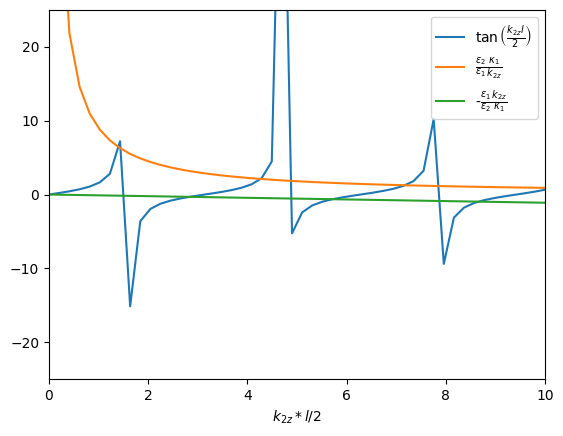

In [14]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt

eps_1 = 1
eps_2 = 9
l = 1
kappa = 1

def sol_1(x):
    return (eps_2 / eps_1)*(kappa/x)
def sol_2(x):
    return -(eps_1 / eps_2) *(x/kappa)

k_2z = np.linspace(0.01, 20)
plt.plot(k_2z*l/2, np.tan(k_2z*l/2), label = r'$\tan\left(\frac{k_{2z}l}{2}\right)$')
plt.plot(k_2z*l/2, sol_1(k_2z*l/2), label = r'$\frac{\epsilon_2}{\epsilon_1} \frac{\kappa_1}{k_{2z}}$')
plt.plot(k_2z*l/2, sol_2(k_2z*l/2), label = r'-$\frac{\epsilon_1}{\epsilon_2} \frac{k_{2z}}{\kappa_1}$')
plt.ylim(-25, 25)
plt.xlim(0, 10)
plt.xlabel(r"$k_{2z} *l/2$")
plt.legend()